In [6]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset
import matplotlib.pyplot as plt 
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [4]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
targets_orig = [x.split("\\")[-1][:-4] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc) + 1

print(targets_enc)
print(len(lbl_enc.classes_))

(
    train_imgs,
    test_imgs,
    train_targets,
    test_targets,
    train_orig_targets,
    test_orig_targets,
) = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1, random_state=42
)

train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs,
    targets=train_targets,
    resize=(config.IMG_HEIGHT, config.IMG_WIDTH),
)

[[ 1  1  5 14 10]
 [ 1  1 10  4 15]
 [ 1  2  4  5 13]
 ...
 [19 19  7  1  3]
 [19 19 13  4 13]
 [19 19 15  4  6]]
19


In [10]:
npimg = train_dataset[0]["images"].numpy().transpose((1, 2, 0))

In [11]:
npimg.shape

(75, 300, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


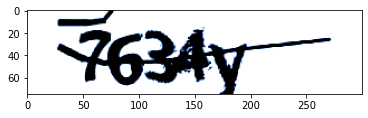

In [12]:
plt.imshow(npimg)